#                                            PRODUCTION ENGINEERING I 
##                                           *OIL & GAS SEPARATORS*

***

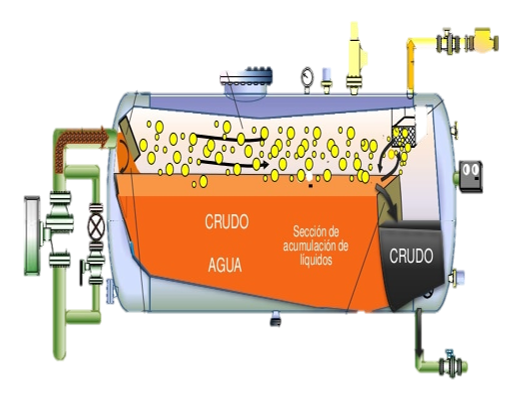

# Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import isclose, sqrt

In [2]:
%config Completer.use_jedi = False

## Vertical Two-Phase Separators

In [59]:
def separator_bif_vertical(qg, ql, Api, sg_gas, P, T, z, dm, u):
    pho_l = 62.4 * (141.5 / (131.5 + Api))
    pho_g = 2.7 * sg_gas * P / (z * (T + 460))
    cd = 0.34
    df = pd.DataFrame()
    # Iterate until the cd value converge
    while True:
        vt = 0.0119 * ((pho_l - pho_g) / pho_g * (dm / cd))**0.5
        re = (0.0049 * pho_g * dm * vt) / u
        cd_cal = 24 / re + 3 / re**0.5 + 0.34
        df1 = pd.DataFrame({'cd':[cd], 'Vt':[vt], 'Re':[re], 'Cd_cal':[cd_cal]})
        df = pd.concat([df, df1])
        cd = cd_cal
        row = np.array(df.iloc[-1, :])
        if isclose(row[0], row[-1], abs_tol=0.0001) is True:
            break
    print(f" Iterations Table: \n{df}")
    cd = df.iloc[-1, -1]
    d_min = sqrt(5040 * (((T + 460) * z * qg) / P) * ((pho_g / (pho_l - pho_g)) * (cd / dm))**0.5)
    tr = [3, 2, 1]
    dia = [24, 30, 36, 42, 48]
    tabla = pd.DataFrame()
    # Looping to create results table
    for t in tr:
        for diam in dia:
            tabla1 = pd.DataFrame({'tr(min)': [t], 'd(in)': [diam]})
            tabla = pd.concat([tabla, tabla1])
    tabla['h(in)'] = (tabla['tr(min)'] * ql) / (tabla['d(in)']**2 * 0.12)
    tabla['Lss(ft)'] = np.where(tabla['d(in)'] <= 36, (tabla['h(in)'] + 76) / 12, \
                                (tabla['h(in)'] + tabla['d(in)'] + 40) / 12)
    tabla['12LSS/d'] = (12 * tabla['Lss(ft)']) / tabla['d(in)']
    print(f"\nResults Table: \n {tabla}")
    print("\nOptimal Results Table: \n Here the Engineers must select a diameter greater than\
    the minimum diameter as well as a slenderness radius between 3 and 4")
    # Slice the results table, considering conditions to get the best dimension of the separator
    tabla_res = tabla.loc[(tabla['d(in)'] > d_min) & (tabla['12LSS/d'] > 3) & (tabla['12LSS/d'] < 4)]
    return tabla_res

In [60]:
separator_bif_vertical(10, 2000, 40, 0.6, 1000, 60, 0.84, 140, 0.013)

 Iterations Table: 
         cd        Vt          Re    Cd_cal
0  0.340000  0.866681  169.618128  0.711843
0  0.711843  0.598972  117.224858  0.821819
0  0.821819  0.557456  109.099739  0.847199
0  0.847199  0.549042  107.453133  0.852762
0  0.852762  0.547249  107.102056  0.853968
0  0.853968  0.546862  107.026397  0.854229
0  0.854229  0.546779  107.010055  0.854285

Results Table: 
    tr(min)  d(in)      h(in)    Lss(ft)   12LSS/d
0        3     24  86.805556  13.567130  6.783565
0        3     30  55.555556  10.962963  4.385185
0        3     36  38.580247   9.548354  3.182785
0        3     42  28.344671   9.195389  2.627254
0        3     48  21.701389   9.141782  2.285446
0        2     24  57.870370  11.155864  5.577932
0        2     30  37.037037   9.419753  3.767901
0        2     36  25.720165   8.476680  2.825560
0        2     42  18.896447   8.408037  2.402296
0        2     48  14.467593   8.538966  2.134742
0        1     24  28.935185   8.744599  4.372299
0        1

,tr(min),d(in),h(in),Lss(ft),12LSS/d
0,3,36,38.580247,9.548354,3.182785
0,2,30,37.037037,9.419753,3.767901
0,1,30,18.518519,7.876543,3.150617


In [88]:
d = np.array([16, 20, 24, 30, 36, 42, 48])
t = np.array([3])
df = pd.DataFrame()
for time in t:
    for dia in d:
        df1 =  pd.DataFrame({'t':[time], 'd':[dia]})
        df =  pd.concat([df, df1])
df['Gas_Leff'] = 39.85 / df['d']
df['liq_Leff'] = (df['t'] * 2000) / (df['d']**2 * 0.7) 
df['Lss'] = df['liq_Leff'] * (df['d'] / 12)
df['Lss2'] = 0.75 * df['liq_Leff']
df['Lss3'] = np.where(df['Gas_Leff'] > df['liq_Leff'], df['Gas_Leff'] + (df['d'] / 12), 0.75 * df['liq_Leff'])
df['12Lss/d'] = (12 * df['Lss']) / df['d']
df

,t,d,Gas_Leff,liq_Leff,Lss,Lss2,Lss3,12Lss/d
0,3,16,2.490625,33.482143,44.642857,25.111607,25.111607,33.482143
0,3,20,1.992500,21.428571,35.714286,16.071429,16.071429,21.428571
0,3,24,1.660417,14.880952,29.761905,11.160714,11.160714,14.880952
0,3,30,1.328333,9.523810,23.809524,7.142857,7.142857,9.523810
0,3,36,1.106944,6.613757,19.841270,4.960317,4.960317,6.613757
0,3,42,0.948810,4.859086,17.006803,3.644315,3.644315,4.859086
0,3,48,0.830208,3.720238,14.880952,2.790179,2.790179,3.720238


In [103]:
d = np.array([16, 20, 24, 30, 36, 42, 48])
t = np.array([3])
df = pd.DataFrame()
df = (pd.concat([df, pd.DataFrame({'t':[time], 'd':[dia]})])  for time in t for dia in d)

In [109]:
print(next(df))

StopIteration: 